=== 단기 수익률 기준 김문수 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
한솔홈데코      -0.097835
대영포장       -0.151882
평화산업       -0.252737
평화홀딩스      -0.534941
Name: KODEX200, dtype: float64


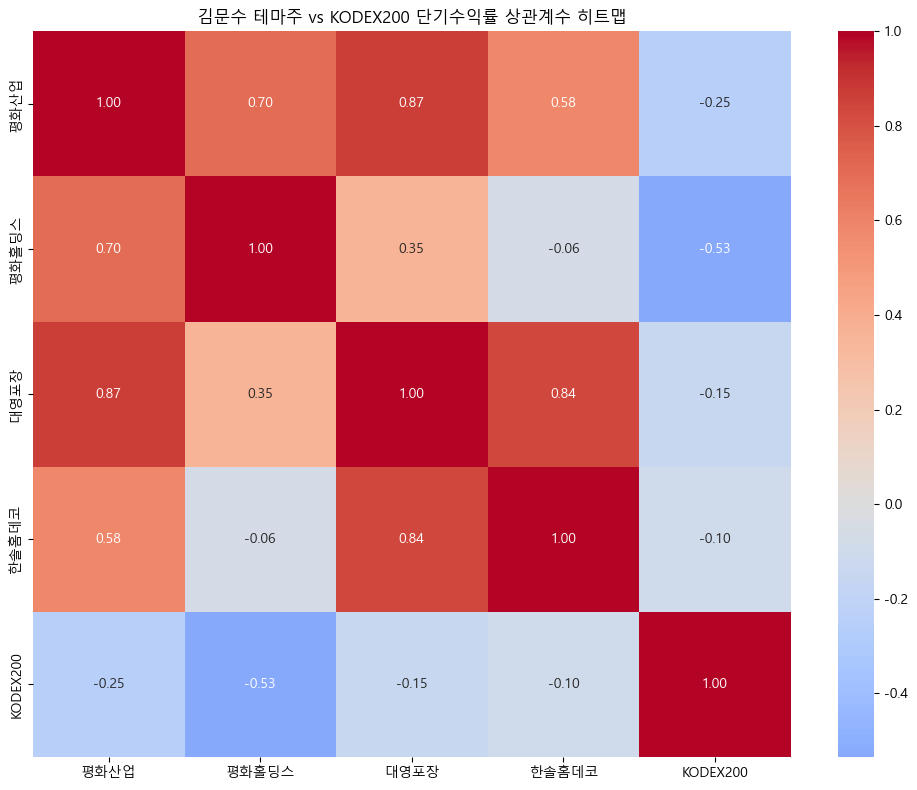

In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False



label_dict = {
    'thema1': '평화산업',
    'thema2': '평화홀딩스',
    'thema3': '대영포장',
    'thema4': '한솔홈데코',
}


# 날짜 설정
start_date = '2025-04-23' #경선확정일 - 10
end_date = '2025-05-13' #경선확정일 + 10

#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date)
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능
thema1 = fdr.DataReader('090080', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('010770', start=start_date, end=end_date)
thema3 = fdr.DataReader('014160', start=start_date, end=end_date)
thema4 = fdr.DataReader('025750', start=start_date, end=end_date)


thema= pd.DataFrame()
#(1)에 추가했을 경우 이 부분도 추가해주세요
thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']


# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 김문수 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("김문수 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
